https://www.kaggle.com/vikrishnan/boston-house-prices

https://www.kaggle.com/prasadperera/the-boston-housing-dataset

### Run this first

In [4]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import mean_squared_error

%matplotlib inline

In [5]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Importing Dataset

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per $10,000

* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

In [7]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [13]:
housing = pd.read_csv('housing.csv',header=None,names=column_names,sep='\s+')

In [5]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Data Cleaning

In [8]:
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Visualisation

In [9]:
housing.corr()['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [11]:
housing.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [14]:
cols = ['ZN','CHAS','RM','DIS','B','MEDV']

<AxesSubplot:>

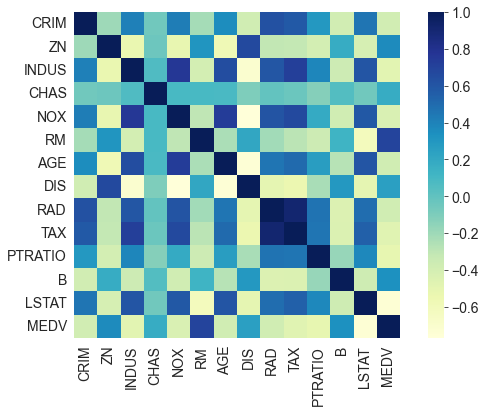

In [10]:
sns.heatmap(housing.corr(),square=True,cmap='YlGnBu')

In [72]:
house = housing[cols]
house.head()

,ZN,CHAS,RM,DIS,B,MEDV
0,18.0,0,6.575,4.0900,396.90,24.0
1,0.0,0,6.421,4.9671,396.90,21.6
2,0.0,0,7.185,4.9671,392.83,34.7
3,0.0,0,6.998,6.0622,394.63,33.4
4,0.0,0,7.147,6.0622,396.90,36.2


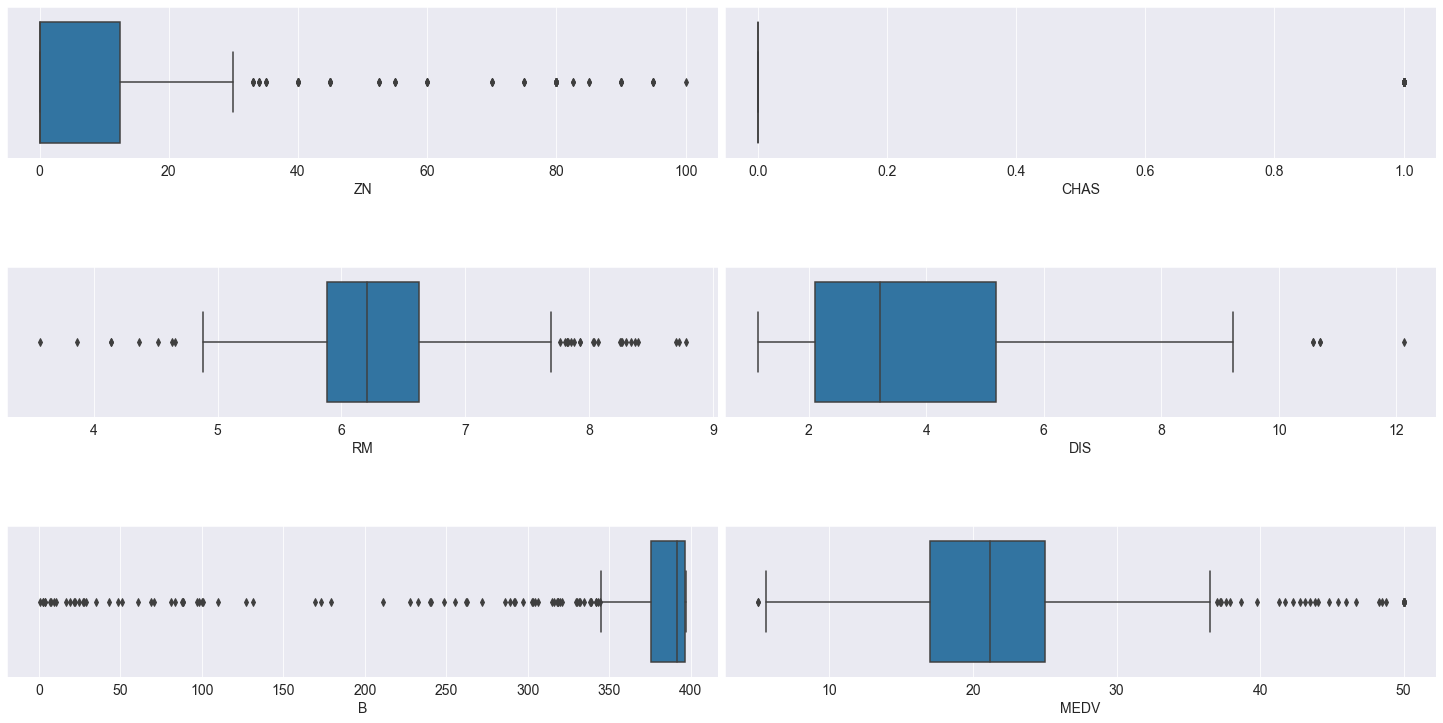

In [47]:
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(20, 10))
index = 0
axs = ax.flatten()
for k,v in house.items():
    sns.boxplot(data=house,x=v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Removing Outliers

In [55]:
for k, v in house.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(house)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column ZN outliers = 13.44%
Column CHAS outliers = 100.00%
Column RM outliers = 5.93%
Column DIS outliers = 0.99%
Column B outliers = 15.22%
Column MEDV outliers = 7.91%


In [2]:
house = housing[cols]
house = house[house['B']>350]
house = house[house['MEDV']<40]
house = house[(house['RM']>4.5) & (house['RM']<8)]
house = house[house['DIS']<10]
house = house[house['ZN']<40]
print(house.head())

NameError: name 'housing' is not defined

C:\Users\malla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\malla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\malla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

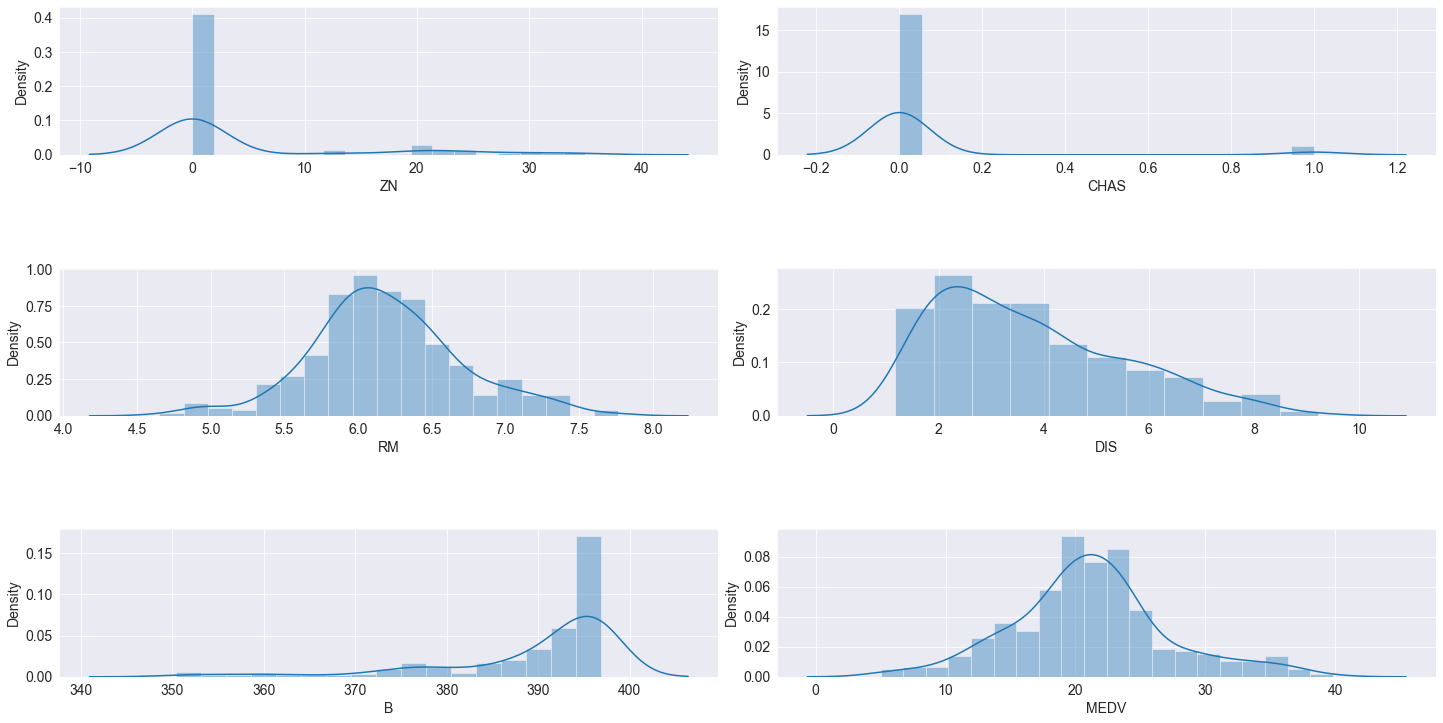

In [91]:
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(20, 10))
index = 0
axs = ax.flatten()
for k,v in house.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Feature Scaling

In [92]:
house.head()

,ZN,CHAS,RM,DIS,B,MEDV
0,18.0,0,6.575,4.0900,396.90,24.0
1,0.0,0,6.421,4.9671,396.90,21.6
2,0.0,0,7.185,4.9671,392.83,34.7
3,0.0,0,6.998,6.0622,394.63,33.4
4,0.0,0,7.147,6.0622,396.90,36.2


In [128]:
f_col = ['ZN','RM','DIS','B']
scaled = house[f_col]
scaler = StandardScaler().fit(scaled)
scaled = scaler.transform(scaled)
X = house[f_col]
X[f_col] = scaled
Y = house['MEDV']

C:\Users\malla\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


### Modelling

In [137]:
def rmse(x,y):
    return np.sqrt(np.mean(np.square(x-y)))

#### Linear Regression

In [298]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42)
model = LinearRegression().fit(x_train,y_train)
y_pred = model.predict(x_test)
print('RMSE is :',rmse(y_test,y_pred))
print('Coefficient of determination :',model.score(x_test,y_test))
kf = KFold(n_splits=10)
skf = StratifiedKFold(n_splits=10)
scores = cross_val_score(model, X, Y, cv=kf)
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

RMSE is : 4.168776150855178
Coefficient of determination : 0.4819665643715072
MSE: 0.01 (+/- 0.68)


#### Polynomial Regression

In [285]:
poly = PolynomialFeatures(degree=3).fit(X)
X1 = poly.transform(X)
x_train,x_test,y_train,y_test = train_test_split(X1,Y,random_state=42)
model = LinearRegression().fit(x_train,y_train)
y_pred = model.predict(x_test)
print('RMSE is :',rmse(y_test,y_pred))
print('Coefficient of determination :',model.score(x_test,y_test))
kf = KFold(n_splits=10)
skf = StratifiedKFold(n_splits=10)
scores = cross_val_score(model, X, Y, cv=kf)
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

RMSE is : 3.7614450457576596
Coefficient of determination : 0.578254863874047
MSE: 0.01 (+/- 0.68)


#### Decision Tree Regression

In [295]:
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42)
model = DecisionTreeRegressor(max_depth=5).fit(x_train,y_train)
y_pred = model.predict(x_test)
print('RMSE is :',rmse(y_test,y_pred))
print('Coefficient of determination :',model.score(x_test,y_test))
kf = KFold(n_splits=10)
skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(model, X, Y, cv=kf) #scoring='neg_mean_squared_error'
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

RMSE is : 3.6439268042521964
Coefficient of determination : 0.6041962271427261
MSE: -0.22 (+/- 0.67)
